In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#데이터 불러오기
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
#상위 10개 데이터
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [9]:
#전체 데이터 평균 / 최소 / 최대 
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


**평균 판매량 : NA > EU > JP** / **출시 년도 : 1980 ~ 2020**

In [11]:
#장르 , 전체 판매량 / agg = 다중 집계 작업에 사용

df.groupby('Genre')['Global_Sales'].agg(np.mean).sort_values(ascending=False)

Genre
Platform        0.938341
Shooter         0.791885
Role-Playing    0.623233
Racing          0.586101
Sports          0.567319
Fighting        0.529375
Action          0.528100
Misc            0.465762
Simulation      0.452364
Puzzle          0.420876
Strategy        0.257151
Adventure       0.185879
Name: Global_Sales, dtype: float64

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

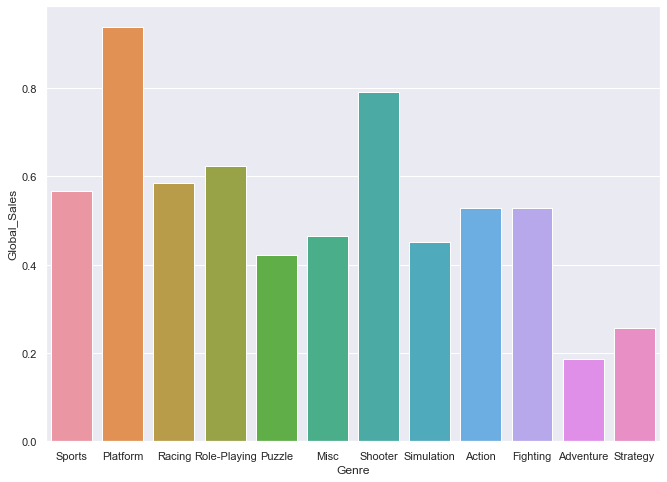

In [28]:
sns.set(rc = {'figure.figsize':(11,8)})
plot = sns.barplot(data=df, x='Genre', y='Global_Sales', ci=None)
plot

**1위 : Platform** /
**2위 : Shooter** /
**3위 : Role-Playing**

In [12]:
#장르, NA(북미) 판매량

df.groupby('Genre')['NA_Sales'].agg(np.mean).sort_values(ascending=False)

Genre
Platform        0.504571
Shooter         0.444733
Sports          0.291283
Racing          0.287766
Action          0.264726
Fighting        0.263667
Misc            0.235906
Role-Playing    0.219946
Puzzle          0.212680
Simulation      0.211430
Strategy        0.100881
Adventure       0.082271
Name: NA_Sales, dtype: float64

In [13]:
#장르, EU(유럽) 판매량

df.groupby('Genre')['EU_Sales'].agg(np.mean).sort_values(ascending=False)

Genre
Shooter         0.239137
Platform        0.227573
Racing          0.190865
Sports          0.160635
Action          0.158323
Simulation      0.130773
Role-Playing    0.126384
Misc            0.124198
Fighting        0.119481
Puzzle          0.087251
Strategy        0.066579
Adventure       0.049868
Name: EU_Sales, dtype: float64

In [14]:
#장르, JP(일본) 판매량

df.groupby('Genre')['JP_Sales'].agg(np.mean).sort_values(ascending=False)

Genre
Role-Playing    0.236767
Platform        0.147596
Fighting        0.103007
Puzzle          0.098471
Simulation      0.073472
Strategy        0.072628
Misc            0.061967
Sports          0.057702
Action          0.048236
Racing          0.045388
Adventure       0.040490
Shooter         0.029221
Name: JP_Sales, dtype: float64

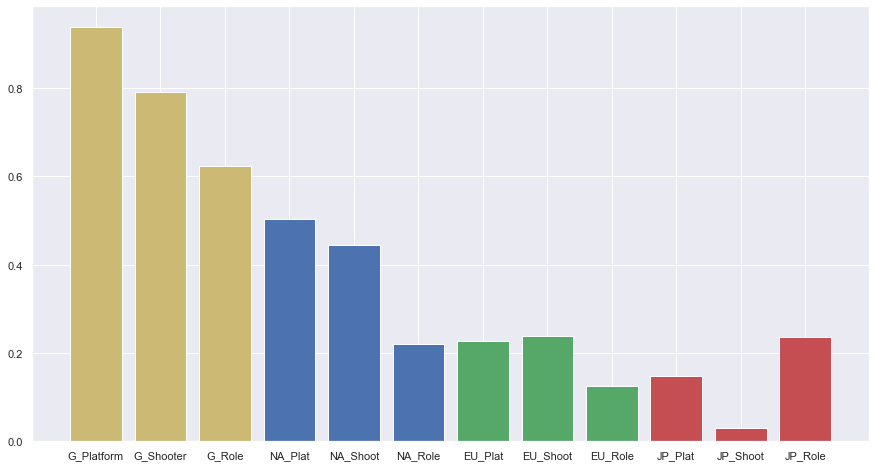

In [36]:
#상위 3장르 국가별 판매량

x = np.arange(12)
Genres = ['G_Platform', 'G_Shooter', 'G_Role', 
         'NA_Plat', 'NA_Shoot', 'NA_Role', 
         'EU_Plat', 'EU_Shoot', 'EU_Role', 
        'JP_Plat', 'JP_Shoot', 'JP_Role']
values = [0.938341, 0.791885, 0.623233,
          0.504571, 0.444733, 0.219946, 
          0.227573, 0.239137, 0.126384,
          0.147596, 0.029221, 0.236767]

plt.bar(x, values, color=['y','y','y','b','b','b','g','g','g','r','r','r'])
plt.xticks(x, Genres)

plt.show()

**Platform 장르의 전체 판매량 중 절반 이상이 북미에서 판매**

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

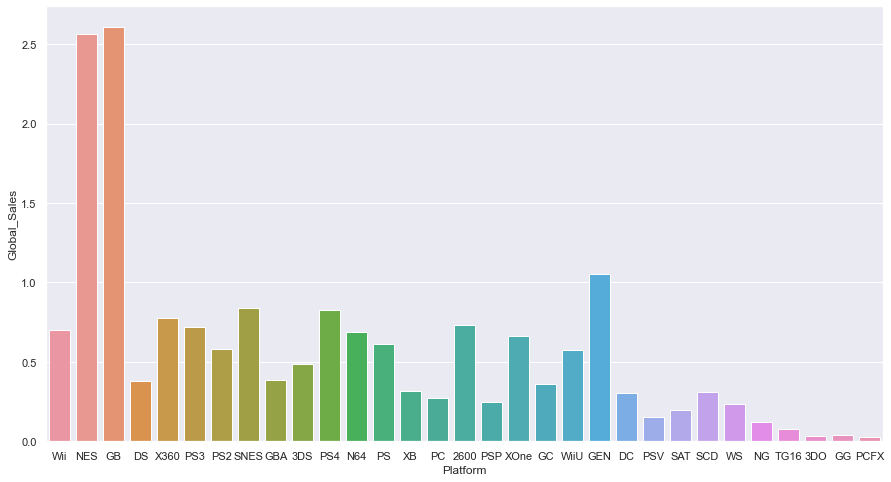

In [31]:
sns.set(rc = {'figure.figsize':(15,8)})
plot = sns.barplot(data=df, x='Platform', y='Global_Sales', ci=None)
plot

**GB(Game Boy) 게임이 가장 많이 팔림**

In [43]:
#랭킹 내에 가장 많은 장르

df_2 = df.groupby('Genre')['Rank'].count().sort_values(ascending=False)
df_2

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Rank, dtype: int64

<AxesSubplot:xlabel='Genre'>

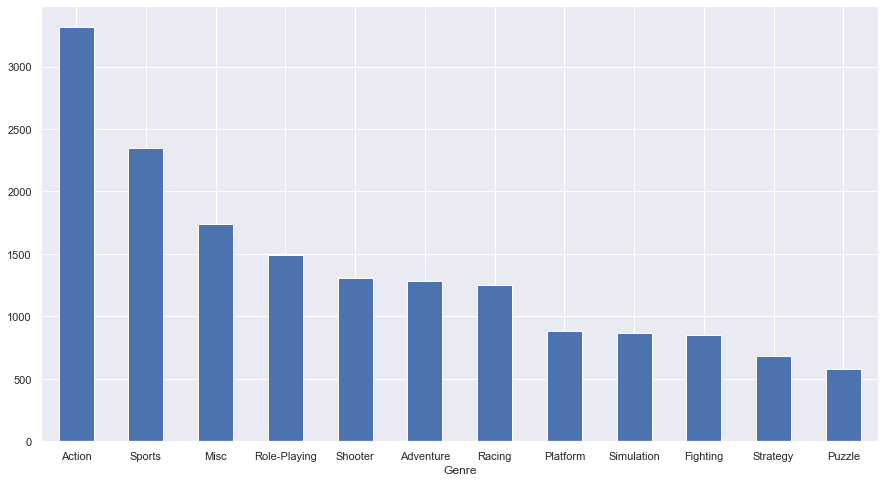

In [50]:
df_2.plot.bar(x='Genre',y='count',rot=0)

**랭킹 내에 Action 장르가 가장 많음**